In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


Importing plotly failed. Interactive plots will not work.


In [3]:
# loading in the dataset
df = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/OCT Exam 2024/Datasets/archive (2)/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# Keeping only the 'date' and 'salary' columns
df = df[['work_year', 'salary']]
df

,work_year,salary
0,2023,80000
1,2023,30000
2,2023,25500
3,2023,175000
4,2023,120000
...,...,...
3750,2020,412000
3751,2021,151000
3752,2020,105000
3753,2020,100000


In [5]:
#Converting 'year' to datetime assuming January 1st and renaming the columns
df['ds'] = pd.to_datetime(df['work_year'].astype(str) + '-01-01')
df.rename(columns={'salary': 'y'}, inplace=True)
df.head()

,work_year,y,ds
0,2023,80000,2023-01-01
1,2023,30000,2023-01-01
2,2023,25500,2023-01-01
3,2023,175000,2023-01-01
4,2023,120000,2023-01-01


In [6]:
# dropping work_year as it is not a necessary column
df.drop(columns=['work_year'], inplace=True)

In [7]:
# showing dataset
df

,y,ds
0,80000,2023-01-01
1,30000,2023-01-01
2,25500,2023-01-01
3,175000,2023-01-01
4,120000,2023-01-01
...,...,...
3750,412000,2020-01-01
3751,151000,2021-01-01
3752,105000,2020-01-01
3753,100000,2020-01-01


In [8]:
# fitting the model
model = Prophet()
model.fit(df)

14:57:29 - cmdstanpy - INFO - Chain [1] start processing
14:57:30 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# making a forecast

# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=365) 




In [10]:
# making a prediction
forecast = model.predict(future)

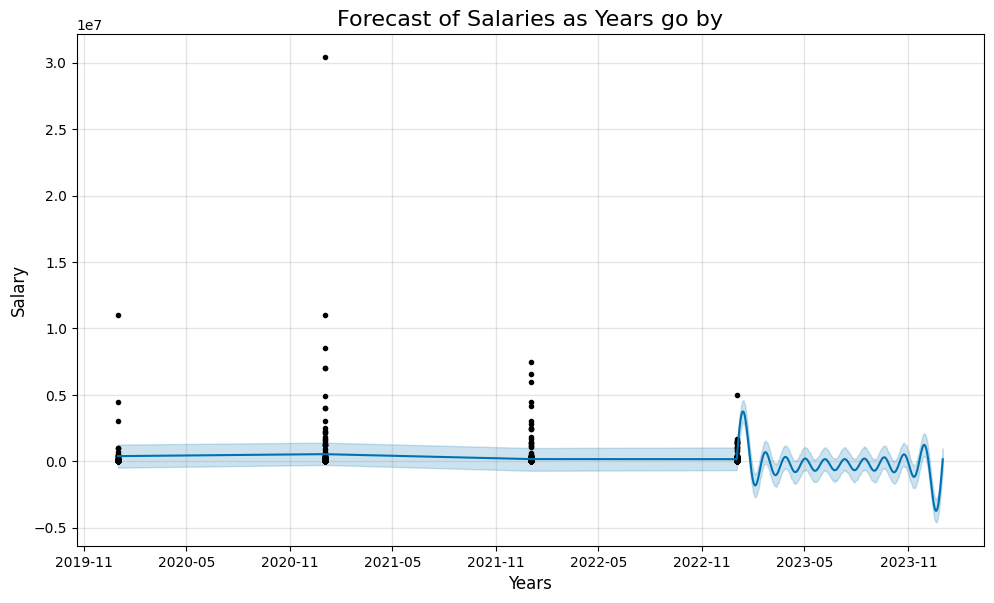

In [12]:
# Visualizing the prediction
model.plot(forecast)
plt.title('Forecast of Salaries as Years go by', fontsize=16)  
plt.xlabel('Years', fontsize=12)              
plt.ylabel('Salary', fontsize=12)
plt.show()